(conjugate-symmetry)=
# Conjugate Symmetry

In [1]:
%run ../setup.ipynb

````{admonition} Theorem: DFT conjugate symmetry
Let $\blue{x[n]}$ be a real-valued signal with $N$ samples.

Then the DFT series $\darkblue{X[0], X[1], \dots, X[N-1]}$ has **conjugate symmetry**:

```{math}
\darkblue{X[m]} = \overline{\darkblue{X[N-m]}}.
```
````

In words, this says that the DFT component $\darkblue{X[m]}$ is the complex conjugate of component $\darkblue{X[N-m]}$ (and vice versa): their real parts are identical, and their imaginary parts are negatives of each-other.

As it turns out, we've seen a version of this already when computing the DFT of {ref}`sinusoids <example-sinusoids>`.
A careful look at how we approached the problem will reveal that none of the argument depended on the fact that the input signal $\blue{x[n]}$ was a sinusoid, only that it was real-valued!
Here, we can give a slightly more streamlined proof using the complex exponential.

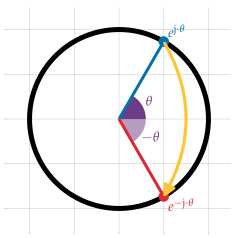

In [2]:
fig, ax = plt.subplots(figsize=figaspect(0.4))

angle = np.pi / 3
x, y = np.cos(angle), np.sin(angle)

circ = patches.Ellipse((0, 0), 2, 2, edgecolor='k', linewidth=5, fill=False)

#ax.plot([x, x], [-y, y], color=colors[5])

a2 = patches.FancyArrowPatch((x, y), (x, -y),
                                 connectionstyle="angle3,angleA=-60,angleB=60", 
                                 arrowstyle='simple, head_width=10, head_length=10', 
                                 color=colors[2], linewidth=3, zorder=10)
ax.add_patch(a2)

ax.plot([0, x], [0, y])
arc = patches.Wedge((0, 0), 0.3, theta1=0, theta2=angle * 180 / np.pi, facecolor=colors[4])
ax.text(0.3, 0.15, r'$\theta$',  color=colors[4])
arc2 = patches.Wedge((0, 0), 0.3, theta2=0, theta1=-angle * 180 / np.pi, facecolor=colors[4], alpha=0.5)
ax.text(0.25, -0.25, r'$-\theta$',  color=colors[4])
ax.text(x + 0.05, y + 0.05, r'$e^{\mathrm{j}\cdot\theta}$', color=colors[0])
ax.text(x + 0.05, -y - 0.05, r'$e^{-\mathrm{j}\cdot\theta}$', color=colors[1], va='top')
ax.scatter([x, x], [y, -y], c=colors[:2], marker='o', s=100, zorder=4)
ax.add_patch(circ)
ax.add_patch(arc)
ax.add_patch(arc2)

ax.plot([0, x], [0, -y], color=colors[1])

ax.set(xlim=[-1.25, 1.25], ylim=[-1.25, 1.25], 
        xticklabels=[], yticklabels=[]);
ax.set_aspect('equal')
glue('exp-conj', fig, display=False)

## Proof

We'll start by observing that for any complex exponential $e^{\mathrm{j} \cdot \theta}$, the following holds:

```{math}
\overline{e^{\mathrm{j}\theta}} = e^{-\mathrm{j}\theta} 
```

````{margin}
```{glue:figure} exp-conj
Conjugating a complex exponential $e^{\mathrm{j}\theta}$ is equivalent to negating its angle $\theta$.
```
````

This follows immediately from Euler's formula {eq}`euler`

```{math}
e^{\mathrm{j}\theta} = \red{\cos(\theta)} + \mathrm{j} \cdot \purple{\sin\theta}
```
and the {ref}`symmetry rules <wave-symmetry>` for $\cos$ and $\sin$:


\begin{align*}
\cos(-\theta) &= \cos(\theta)\\
\sin(-\theta) &= -\sin(\theta)
\end{align*}

so that


\begin{align*}
e^{-\mathrm{j}\cdot\theta} &= \red{\cos(-\theta)} + \mathrm{j}\cdot\purple{\sin(-\theta)}\\
&= \red{\cos(\theta)} - \mathrm{j}\cdot\purple{\sin(\theta)}\\
&= \overline{e^{\mathrm{j}\cdot\theta}}.
\end{align*}


Taking $\theta = 2\pi\cdot\frac{N-m}{N}\cdot n$, we get

\begin{align*}
\exp\left(\red{-}\mathrm{j}\cdot 2\pi \cdot \frac{\red{N-m}}{N} \cdot n \right) 
&= \exp\left(\cyan{+}\mathrm{j}\cdot 2\pi \cdot \frac{\cyan{m-N}}{N} \cdot n \right) & \text{cancelling negatives}\\
&= \exp\left(\mathrm{j}\cdot 2\pi \cdot \frac{m}{N} \cdot n \right) & \text{add rotations } 2\pi\cdot n \cdot N / N\\
&= \overline{\exp\left(-\mathrm{j}\cdot 2\pi \cdot \frac{m}{N} \cdot n \right)} & \text{conjugation}.
\end{align*}

This lets us express $\darkblue{X[N-m]}$ as follows:

\begin{align*}
\darkblue{X[N-m]} &= \sum_{n=0}^{N-1} \blue{x[n]} \cdot \exp\left(-\mathrm{j}\cdot 2\pi \cdot \frac{N-m}{N} \cdot n \right) \\
&= \sum_{n=0}^{N-1} \blue{x[n]} \cdot \overline{\exp\left(-\mathrm{j}\cdot 2\pi \cdot \frac{m}{N} \cdot n \right)}\\
&= \overline{\sum_{n=0}^{N-1} \blue{x[n]} \cdot \exp\left(-\mathrm{j}\cdot 2\pi \cdot \frac{m}{N} \cdot n \right)}\\
&= \overline{\darkblue{X[m]}}.
\end{align*}

```{warning}

The last step hinges upon the fact that $\blue{x[n]}$ is real-valued, so $\blue{x[n]}\cdot\overline{z} = \overline{\blue{x[n]} \cdot z}$ for any complex $z$.
If $\blue{x[n]}$ was complex-valued, this step would not go through, and we would not have conjugate symmetry!
```

## Which frequencies do we need to compute?

DFT conjugate symmetry says that there is *redundancy* in the spectral content of a real-valued signal.
But what exactly is the minimal set of frequencies that we *must* compute to fully represent the signal?

We can think of this by working through each $m=0, 1, 2, \dots N-1$ and seeing which other components can be inferred once we have $\darkblue{X[m]}$.
We can stop when all $N$ have been covered.

- $\purple{m=0} \Leftrightarrow \purple{N-0= N \equiv 0}$ - The DC component pairs with itself.
- $\blue{m=1} \Leftrightarrow \red{N-1}$
- $\blue{m=2} \Leftrightarrow \red{N-2}$
- $\dots$

How far we can go with this depends on whether $N$ is even or odd.
If $N$ is even, then 

```{math}
\purple{m = \frac{N}{2}} \Leftrightarrow \red{N-\frac{N}{2}} = \purple{\frac{N}{2}}
```
give us the Nyquist frequency, which like the $\purple{m=0}$ case, pairs with itself.
In this case, we'll have a total of $M = 1 + N/2$ frequencies: $m=0$ followed by everything up to and including $m=N/2$.

If $N$ is odd, then there is no $m$ such that $m=N-m$.
The largest $m$ such that $m < N/2$ (so $N-m > N/2$) is $m = (N-1) / 2$.
This gives us a total of $M = 1 + (N-1)/2$ frequencies.

These two cases can be combined to give a single formula for $M$

```{math}
M = 1 + \left\lfloor \frac{N}{2} \right\rfloor
```

where $\lfloor\cdot\rfloor$ is the "floor" operation: the largest integer no greater than its input.
This expression is implemented in Python as:
```python
M = 1 + N // 2  # Integer division
```

{numref}`conjugate-symmetry-fig` depicts the conjugate symmetry relationships graphically for both the even- and odd-length cases.

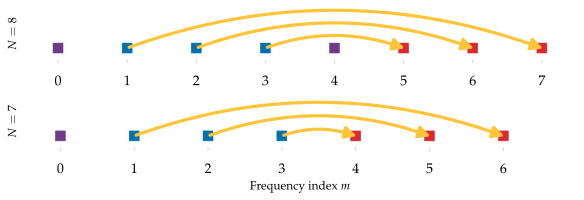

In [6]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharey=True, figsize=figaspect(1./3))

N1 = np.arange(8)
N2 = np.arange(7)
M1 = 1 + len(N1) // 2
M2 = 1 + len(N2) // 2
ax1.scatter(N1, np.zeros_like(N1), c=[colors[4]] +[colors[0]] * (M1-2) + [colors[4]] + [colors[1]]*(len(N1)-M1), marker='s', s=100)
ax2.scatter(N2, np.zeros_like(N2), c=[colors[4]] +[colors[0]] * (M2-1) + [colors[1]]*(len(N2)-M2), marker='s', s=100)


for m in range(1, M1-1):
    arc = patches.FancyArrowPatch((m, 0), (len(N1) - m, 0), 
                                 connectionstyle="angle3,angleA=20,angleB=-20",
                                 arrowstyle='simple, head_width=10, head_length=10', 
                                 color=colors[2], linewidth=3, zorder=10)
    ax1.add_patch(arc)
    
for m in range(1, M2):
    arc = patches.FancyArrowPatch((m, 0), (len(N2) - m, 0),
                                 connectionstyle="angle3,angleA=20,angleB=-20",
                                 arrowstyle='simple, head_width=10, head_length=10', 
                                 color=colors[2], linewidth=3, zorder=10)
    ax2.add_patch(arc)


ax1.set(xlim=[-0.5, 2*M1-2.5], ylim=[-2, 7], yticks=[], ylabel='$N={}$'.format(len(N1)))
ax2.set(xlim=[-0.5, 2*M2-1.01], ylabel='$N={}$'.format(len(N2)));
ax1.grid(False)
ax2.grid(False)
ax2.set(xlabel='Frequency index $m$');
glue('dft-conjsym', fig, display=False)

```{glue:figure} dft-conjsym
---
name: conjugate-symmetry-fig
---

The DFT conjugate symmetry property relates $\blue{X[m]}$ with $\red{X[N-m]}$ (arrows).
Indices $\purple{m=0}$ and $\purple{m=N/2}$ (if $N$ is even) are only related to themselves.
If the signal length is even (*top*, $N=8$), then the first $M=1 + N/2$ components are sufficient to determine all $N$ components.
If the signal length is odd (*bottom*, $N=7$), then $M=1 + (N-1)/2$ are sufficient.
```

## Why does this matter?

Conjugate symmetry can buy us some efficiency in both the time to compute the DFT, and the space it takes to store the results.

Most Fourier transform implementations provide a specialized function `rfft` (real-valued input FFT) which can efficiently compute just the non-negative frequency values.

```python
# Compute the full spectrum, all N frequencies
X = np.fft.fft(x)

# Compute just the non-negative spectrum: 1 + N//2 frequencies
X = np.fft.rfft(x)
```

For small values of $N$ like the examples we've been working with, this is not such a big deal.
However, it is not uncommon to have signals of thousands of samples: in this case, reducing the amount of data by 50% can substantially cut down on memory consumption and processing time.
This is also beneficial in real-time audio applications, where there can be tight constraints on latency and computing a DFT is often the computational bottleneck.

Additionally, conjugate symmetry teaches us two facts about the DFT:

1. Because the DC component ($m=0$) is its own conjugate, $\darkblue{X[0]} = \overline{\darkblue{X[0]}}$, we know that it must be real-valued.  This shouldn't be surprising, given that it must also equal the sum of the (real-valued) input samples contained in $\blue{x[n]}$.
2. If $N$ is even, then the Nyquist component $m=N/2$ is also self-conjugate: $\darkblue{X[N/2]} = \overline{\darkblue{X[N/2]}}$.  It must also be real-valued if $\blue{x[n]}$ is.  This is much less obvious from the DFT definition!